In [1]:
import numpy as np
import torch
import os
from os import listdir
from os.path import isfile, isdir, join
import ntpath
import librosa
import hgtk
import soundfile as sf
from scipy.io.wavfile import read



In [2]:
def find_wav(path, data_files):
    for file in listdir(path):
        if isfile(join(path, file)) and 'wav' in file:
            data_files.append({'path': join(path, file)})
        elif isdir(join(path, file)):
            data_files = find_wav(path + '/' + file, data_files)
        
    return data_files

root_dir = '/home/scpark/ai/datasets/LibriTTS/train-clean-360'

data_files = []
data_files = find_wav(root_dir, data_files)
print(len(data_files))

116500


In [3]:
for data_file in data_files:
    txt_file = data_file['path'][:-4] + '.normalized.txt'

    with open(txt_file) as f:
        data_file['text'] = f.readline()
            
print(data_file['path'], '|', data_file['text'])


/home/scpark/ai/datasets/LibriTTS/train-clean-360/192/123167/192_123167_000026_000000.wav | Pokeberry Juice to Stain Ices.


In [4]:
id_to_gender = {}
with open('/home/scpark/ai/datasets/LibriTTS/SPEAKERS.txt') as f:
    while(True):
        line = f.readline()
        if len(line) <= 0:
            break
        if line.startswith(';'):
            continue
        line = line.split()
        id_to_gender[line[0]] = line[2]
        
print(id_to_gender)

{'14': 'F', '16': 'F', '17': 'M', '19': 'F', '20': 'F', '22': 'F', '23': 'F', '25': 'M', '26': 'M', '27': 'M', '28': 'F', '29': 'M', '30': 'F', '31': 'M', '32': 'F', '36': 'M', '37': 'M', '38': 'M', '39': 'F', '40': 'F', '44': 'F', '45': 'F', '46': 'M', '47': 'F', '49': 'M', '51': 'M', '52': 'F', '54': 'F', '55': 'M', '56': 'F', '57': 'F', '58': 'M', '60': 'M', '61': 'M', '62': 'M', '64': 'F', '65': 'F', '66': 'M', '70': 'M', '75': 'M', '77': 'F', '78': 'M', '79': 'F', '81': 'M', '82': 'F', '83': 'F', '84': 'F', '85': 'M', '87': 'F', '89': 'F', '90': 'M', '91': 'M', '92': 'F', '93': 'F', '94': 'M', '98': 'F', '100': 'F', '101': 'M', '102': 'F', '103': 'F', '104': 'F', '107': 'M', '110': 'F', '111': 'F', '112': 'F', '114': 'F', '115': 'F', '116': 'M', '118': 'M', '119': 'M', '121': 'F', '122': 'M', '123': 'F', '125': 'F', '126': 'F', '127': 'M', '128': 'M', '133': 'M', '147': 'M', '149': 'M', '150': 'F', '151': 'F', '152': 'M', '153': 'M', '154': 'M', '157': 'M', '159': 'M', '161': 'M',

In [5]:
for data_file in data_files:
    key = os.path.basename(data_file['path']).split('_')[0]
    gender = id_to_gender[key]
    data_file['speaker'] = 0 if gender == 'M' else 1

print('done')

done


In [6]:
for data_file in data_files[:100]:
    print(data_file)

{'path': '/home/scpark/ai/datasets/LibriTTS/train-clean-360/7657/104717/7657_104717_000015_000001.wav', 'text': "I make but a poor figure at composition, my head is much too fickle, my thoughts are running after birds' eggs, play and trifles till I get vexed with myself.", 'speaker': 1}
{'path': '/home/scpark/ai/datasets/LibriTTS/train-clean-360/7657/104717/7657_104717_000011_000004.wav', 'text': 'It was filial tenderness that gave the name.', 'speaker': 1}
{'path': '/home/scpark/ai/datasets/LibriTTS/train-clean-360/7657/104717/7657_104717_000029_000012.wav', 'text': 'It almost seems a mistake, but it was not.', 'speaker': 1}
{'path': '/home/scpark/ai/datasets/LibriTTS/train-clean-360/7657/104717/7657_104717_000030_000004.wav', 'text': 'But still', 'speaker': 1}
{'path': '/home/scpark/ai/datasets/LibriTTS/train-clean-360/114/129317/114_129317_000035_000000.wav', 'text': "'Mother,' said the young man, impatiently, 'he would be a selfish brute, unworthy alike of the name of man and of th

In [7]:
data_dirs = ['/home/scpark/ai/datasets/tts_datasets/kss',
             '/home/scpark/ai/datasets/tts_datasets/jeon',
             '/home/scpark/ai/datasets/tts_datasets/sunny',
             '/home/scpark/ai/datasets/tts_datasets/dio',
             '/home/scpark/ai/datasets/tts_datasets/yoona',
             '/home/scpark/ai/datasets/tts_datasets/suho',
             '/home/scpark/ai/datasets/tts_datasets/changmin',
             '/home/scpark/ai/datasets/tts_datasets/chanyeol',
             '/home/scpark/ai/datasets/tts_datasets/leeteuk']


In [8]:
import json
from tqdm import tqdm

start_tokens = ['/audio', '/1', '/2', '/3', '/4']
sm_data_files = []
for index, data_dir in tqdm(enumerate(data_dirs)):
    speaker = index + 2
    json_file = data_dir + '/alignment.json'
    with open(json_file) as f:
        data = json.load(f)
        for d in data:
            for start_token in start_tokens:
                start_index = d.find(start_token)
                if start_index >= 0:
                    break
                    
            sm_data_files.append({'path': data_dir + d[start_index:], 'text': data[d], 'speaker': speaker})
            
print('done')

9it [00:00, 111.87it/s]

done


In [9]:
data_files += sm_data_files

In [14]:
data_files.sort(key=lambda x: x['speaker'])
print(data_files[:100])

[{'path': '/home/scpark/ai/datasets/LibriTTS/train-clean-360/231/127936/231_127936_000015_000000.wav', 'text': 'Spargo thought awhile, pacing up and down the river bank.', 'speaker': 0}, {'path': '/home/scpark/ai/datasets/LibriTTS/train-clean-360/231/127936/231_127936_000010_000000.wav', 'text': '"Wait!" he said.', 'speaker': 0}, {'path': '/home/scpark/ai/datasets/LibriTTS/train-clean-360/231/127936/231_127936_000032_000001.wav', 'text': 'Breton laughed softly.', 'speaker': 0}, {'path': '/home/scpark/ai/datasets/LibriTTS/train-clean-360/231/127936/231_127936_000032_000000.wav', 'text': 'Myerst made one hurried movement of his right hand towards his hip, but a sudden growl from Breton made him shift it just as quickly above his head, whither the left followed it.', 'speaker': 0}, {'path': '/home/scpark/ai/datasets/LibriTTS/train-clean-360/231/127936/231_127936_000038_000001.wav', 'text': '"You damned young bully!" he exclaimed.', 'speaker': 0}, {'path': '/home/scpark/ai/datasets/LibriTT

In [15]:
speaker = -1
for data_file in data_files:
    if data_file['speaker'] != speaker:
        print(data_file)
        speaker = data_file['speaker']

{'path': '/home/scpark/ai/datasets/LibriTTS/train-clean-360/231/127936/231_127936_000015_000000.wav', 'text': 'Spargo thought awhile, pacing up and down the river bank.', 'speaker': 0}
{'path': '/home/scpark/ai/datasets/LibriTTS/train-clean-360/7657/104717/7657_104717_000015_000001.wav', 'text': "I make but a poor figure at composition, my head is much too fickle, my thoughts are running after birds' eggs, play and trifles till I get vexed with myself.", 'speaker': 1}
{'path': '/home/scpark/ai/datasets/tts_datasets/kss/1/1_0000.wav', 'text': '그는 괜찮은 척하려고 애쓰는 것 같았다.', 'speaker': 2}
{'path': '/home/scpark/ai/datasets/tts_datasets/jeon/audio/tts_000001.wav', 'text': '이모 씨를 왜 욕합니까?', 'speaker': 3}
{'path': '/home/scpark/ai/datasets/tts_datasets/sunny/audio/mad_00001.wav', 'text': '이거 입을 때는 원래 팬티 안 입어요!', 'speaker': 4}
{'path': '/home/scpark/ai/datasets/tts_datasets/dio/audio/happy_00001.wav', 'text': '젊어 보이시네요!', 'speaker': 5}
{'path': '/home/scpark/ai/datasets/tts

In [18]:
import os
import librosa

train_ratio, valid_ratio, test_ratio = 1.0, 0.0, 0.0
train_index = int(len(data_files) * train_ratio)
valid_index = int(len(data_files) * valid_ratio)
test_index = int(len(data_files) * test_ratio)
print(train_index, valid_index, test_index)

def write_filelist(filename, data_files):
    from tqdm.notebook import tqdm
    
    with open(filename, 'w') as file:

        for index, data_file in tqdm(enumerate(data_files)):
            
            sr = librosa.core.get_samplerate(data_file['path'])    
            data, sampling_rate = librosa.core.load(data_file['path'], sr=sr)
            if len(data) > sampling_rate * 10:
                print(len(data))
                continue
                
            l = data_file['path'] + '|' + data_file['text'] + '|' + str(data_file['speaker'])
            file.write(l + os.linesep)

write_filelist('filelists/libri+sm_audio_text_train_filelist.txt', data_files[:train_index])
write_filelist('filelists/libri+sm_audio_text_val_filelist.txt', data_files[train_index:valid_index])
write_filelist('filelists/libri+sm_audio_text_test_filelist.txt', data_files[valid_index:test_index])

153204 0 0



255360
253920
280560
284640
299040
283919
388080
307200
279600
307200
294719
255360
444960
296400
432240
349202
254880
472560
353281
256560
318240
367441
301442
467282
320160
340560
252480
267120
359760
320639
302399
340800
497282
270480
259921
476640
496561
243120
338880
373921
331199
508320
318718
244800
301681
409200
278880
386880
313922
251520
331440
335040
484800
445202
315840
512400
310320
474000
337920
355920
391200
486720
250320
299760
262560
370800
288479
350160
254880
360000
268800
485280
274560
419519
262080
509520
293759
414240
381840
283920
337199
250322
471840
373200
449760
435840
353040
292320
266399
254400
265920
319200
317760
256560
276000
241200
424560
290640
240720
435840
294720
276240
590880
327117
457916
254396
495361
356161
289442
388559
436078
399118
643440
389760
413760
298561
285117
292318
268321
326880
522961
292078
323280
734160
342481
498480
357601
584402
418799
271435
387841
412081
552000
287039
365042
519601
408961
442560
362156
304318
332880
320156
268078

374162
311522
297120
426961
481919
566400
253920
298560
493922
279360
390480
304561
275760
570240
319441
443280
253681
264955
392161
324480
262800
453120
452639
674156
360481
255599
539039
267601
538081
304080
357360
335760
487680
324240
496078
255600
624480
273360
248399
551519
246000
430319
410880
359040
323280
398400
265678
259440
294481
279600
287041
320160
471601
273599
552000
265680
347040
425520
284160
828720
436800
719520
370798
386640
269280
241441
346080
252720
362880
447601
428880
385920
371522
480000
303840
594961
419522
388319
348240
662640
570240
337201
459841
429120
455762
291598
536160
400080
564960
675121
529682
386642
554160
391920
362399
318000
722640
592080
655919
291600
492719
376319
454081
371039
462480
407521
287279
466561
673198
340560
294721
759361
284161
500160
264240
469919
419760
421922
577682
458640
451200
264480
249360
260880
250080
575760
278639
406799
403200
472080
504720
497760
522000
427440
270000
333841
265200
404400
269520
351840
269520
243840
259678

336480
246481
256320
501600
272640
446400
258480
565680
385199
393839
578880
372959
280080
280560
270480
352800
287040
286320
307680
258240
302880
435840
306480
254642
246720
315840
290640
255120
333599
258480
254400
357360
277680
521039
299039
349920
324960
318480
339360
383280
305280
260160
419760
376560
418560
409680
303121
402960
510960
574080
343920
468000
271440
253200
465600
270720
273120
311280
365280
285120
364560
345600
335280
339360
277920
354960
248880
335759
399361
334079
505920
384000
274800
268320
370080
372959
394800
334560
358080
388080
540960
543840
369601
366240
326640
453120
388560
470880
488880
445680
401040
256560
331199
269759
258240
263760
275040
362880
263521
503520
394800
479760
347520
352560
476640
289680
356160
327601
262560
360960
263760
357841
244078
384961
519840
368401
453840
303360
447360
273120
266160
323520
403440
423600
501360
354480
445198
272399
302880
374880
308880
298802
387600
264480
281520
362160
303600
478081
250558
331201
391440
256080
392160

270479
252960
395760
277440
387360
365040
283440
316560
329520
303120
264000
353520
326400
289440
377280
396960
498480
311521
402720
300240
423600
439919
336959
285361
288000
256080
285601
252479
251280
344880
362160
247920
243360
300959
431040
319680
274560
338640
423840
272399
289440
287040
291841
398880
251039
270000
245280
248402
242162
279601
372961
256320
403202
262321
275760
289920
429840
388080
442081
280800
390480
559202
306240
581520
477599
324480
426480
316800
518160
329280
253200
563040
367440
257520
280320
262560
277920
517200
318000
479279
600960
482640
627599
405840
358079
553681
345840
407280
412080
681839
507601
317760
703200
499440
353040
372719
313440
370319
474720
456481
501840
595440
300720
352560
255600
722880
259680
482400
504000
331199
242880
486480
393361
269040
380880
508320
356880
467520
461281
313440
436079
269521
251040
320640
399360
279599
303120
351121
356880
446642
673680
308640
465120
326880
355440
520801
468720
377280
657121
334560
452400
307440
463441

362160
289440
291120
272160
273600
280080
368640
297120
333601
336240
257280
337680
395040
341040
379681
424801
512160
259440
276720
386400
451919
300000
279840
310080
408720
320880
248640
289440
357840
308639
456240
463440
466320
312480
268560
288240
269760
266401
307200
258000
461280
421200
441600
241680
246959
309600
283680
258960
360480
319440
274319
318481
396000
334560
411600
311760
459840
403200
462960
409200
315360
301680
308880
334320
254400
262801
378960
341759
434401
337920
304320
249600
403920
500880
374880
240240
464880
270480
264480
366000
260400
400560
388320
255840
243840
310561
250799
278880
442078
296880
300240
272160
560877
267120
399357
638400
308880
446160
254877
350400
380880
263039
247675
276474
294000
358560
318478
264958
298080
398399
251039
253440
560162
303120
269760
313679
332642
433201
383760
392877
267598
321118
247916
535201
336720
324240
332159
513360
407280
310561
257759
269039
240720
358081
266160
398880
614400
323522
381120
291120
336720
380640
470160

267360
401040
278880
548400
293760
310560
281280
300479
292560
452640
275280
377280
352560
446161
400560
296399
325199
272640
489360
320162
301439
343202
386160
559680
294240
271200
240480
322081
289920
262560
319681
421920
260399
489599
471360
314162
511682
385680
398400
455279
251760
280321
369120
542159
270240
250560
261361
346802
246240
316560
262320
287280
506160
405121
281760
356640
255598
356880
399120
261120
330238
249600
243360
309601
562559
245039
288000
254159
240480
246240
331440
290400
266640
487440
250320
253440
283440
306480
351360
337201
324240
283202
274081
255601
353040
336000
659760
259921
414241
273839
505678
269760
494159
365760
379920
264721
452160
446400
351601
389520
274319
266880
338400
364320
243359
485279
288240
358562
591360
377040
362639
263280
244081
249359
283440
445440
241200
272880
255600
264960
444240
257280
251760
248880
631200
329521
463681
509760
354961
423359
449520
346798
325440
497520
325682
270238
372960
244800
295440
542639
280800
311760
391920

366000
258721
305520
255361
265920
306480
377520
291120
269042
291360
259440
281520
304320
243839
317280
245040
362159
626159
242400
291840
367441
308400
423840
305042
576240
263280
425760
305281
399841
242160
316081
367440
324240
502319
292800
452880
285120
563520
384719
264000
556560
258720
290399
326639
362639
538320
358801
257040
258480
581040
433439
469921
274800
260401
240960
253920
413762
242639
246000
268080
265920
365522
278640
278400
267841
321360
384480
254640
287280
249118
289922
390480
335280
338640
376559
251039
394320
425522
467280
329760
377280
262080
294480
321121
344401
412560
389520
254640
436320
286081
404639
321600
311280
240240
297840
282960
342240
274560
295441
263760
613199
404159
324240
259200
381601
277922
408480
277200
242399
261600
487202
334080
426481
399120
441360
347522
277680
269039
305040
359042
476160
414959
473522
300721
578400
363361
528240
299280
249601
449041
242640
333120
339118
264000
263760
518880
375359
339360
396480
272880
243601
324000
282000

326160
319920
277200
313920
321600
500159
273120
323760
384480
562080
273120
496560
266400
263280
244081
254162
245762
339359
467520
330479
446159
553200
514559
466081
288240
440642
359040
277438
292081
295440
260400
323280
406320
250560
539039
320159
246241
250800
311520
266400
262079
251040
388800
325200
300480
296880
253919
275280
253200
254400
390240
405359
375120
415200
292800
270960
267120
317280
387120
300720
318000
263520
414000
242880
398640
265440
395280
247200
284880
241200
242401
255360
245520
374400
297840
361200
441600
262080
267360
299041
321600
274560
297360
356160
244560
404400
347520
279361
240480
252481
254159
279359
356161
243601
315359
346800
371040
326640
431520
276960
293280
291600
645600
275760
258000
290640
410640
300480
267360
242640
242160
519840
262320
578400
293521
336240
276960
408960
276240
280080
246479
282000
362640
305040
562080
391200
548159
430800
346319
301200
270240
269759
353760
345600
277200
246240
296880
321361
387600
252240
392400
241921
512640

291120
371521
309361
245280
250078
544322
274559
256080
440880
392880
306719
424560
252481
291120
302880
279841
298560
269280
366960
419520
377760
339360
258720
276241
293521
267840
314400
408960
360000
389760
248399
447600
332640
338160
358320
529440
284400
308640
258720
262560
241200
350400
350880
380880
396960
243840
285600
268080
294480
531840
295202
307440
252480
283678
400798
313440
357840
291840
364560
298080
400560
243120
242880
293760
405359
320880
483120
284640
241440
474240
551760
364560
570241
339360
246000
256801
321121
352320
283680
280320
257279
296159
354960
275520
288000
269279
354480
270240
297121
265680
293280
341760
245280
491519
303360
264720
300721
299759
309600
365760
365760
298319
246480
272642
399840
306961
294000
293039
274080
361440
385681
473760
297600
422160
451200
260160
270720
311042
327120
425280
351840
270240
442800
421680
341520
261838
327120
255840
308640
268798
395760
320880
317759
246000
290400
245521
259920
256801
358079
310081
352798
376801
414479

387120
336000
412322
286320
327120
338400
336240
245520
316320
426240
265920
294480
241920
344400
390479
427920
337920
272880
291120
283920
302400
276480
268080
426000
335280
247440
503760
249840
330000
405361
258000
330000
295680
308640
262080
300720
274320
361920
278400
378960
298079
460560
283200
286800
286320
420241
418560
247440
318000
246480
252720
320640
378960
258720
269040
314880
330000
281039
249841
275759
334080
259200
298798
244560
351360
489120
563280
295199
357841
317040
281760
263280
245521
283919
282000
381120
301920
251040
244082
269040
477840
490560
259920
340320
294480
307200
341759
397440
269760
671760
675840
633121
477360
333840
273840
366480
380640
268080
255361
364080
261360
757440
459359
319201
332640
378719
241440
274081
325441
272400
240959
263039
301680
260160
269280
366959
250560
303360
318480
260399
295920
248160
368639
349440
297840
300240
599760
598079
302160
586800
375120
404160
400800
291360
240240
251041
330720
260640
301199
336961
429120
312960
297360

312000
291600
250320
278640
254639
336720
484560
652560
455280
327360
252959
449760
373922
362639
241920
304802
341040
334321
385922
298321
355201
250561
273120
442560
248640
287520
291120
306721
290160
260640
351600
346080
438000
324238
271200
291599
273600
277922
272640
358800
252240
288961
250319
303120
435838
463680
336960
304320
368400
418800
301200
298560
453599
313920
328800
300241
278160
271200
354960
259199
351120
300480
399840
271680
314160
297360
457920
292080
241200
537120
248880
291120
299520
294240
318000
265920
276000
286320
390480
246960
337440
248640
332400
546720
270720
265681
510240
422880
292081
276959
248400
256319
270240
394560
396000
261601
255600
471840
246960
243839
252719
256320
288720
255600
291120
360720
252000
335520
296880
377040
247440
672720
605760
342720
442080
366000
346320
616320
308160
251760
244080
626400
331200
409440
430320
539520
306000
249121
278640
335040
248400
348960
305520
295440
641521
442560
309600
264000
580320
517440
637920
249840
413040

382560
275040
375840
249840
316801
283680
487440
466560
476400
305040
525600
544079
298080
262801
423600
319202
298560
316798
366240
348480
421920
240718
544319
395279
480480
286560
244320
250320
672721
242160
342961
271200
314880
606240
297840
282960
576240
272640
537839
264718
276241
288480
256800
375840
343680
473279
298800
331919
294240
248880
259440
300720
245760
520080
240720
385680
277440
364560
279600
350640
284400
306720
267601
405600
478320
250320
276480
283200
296159
277440
241440
319680
286800
268800
347280
394320
312240
257280
271680
289678
266640
339840
256320
289920
320880
378000
249120
314400
267840
282720
312240
249600
398640
342720
302160
330480
347280
573360
361440
435120
252000
248160
271440
266160
791280
257762
259680
246240
383760
285600
253200
259680
390721
276960
492000
308880
358080
293280
285120
244080
369359
306240
286559
290880
394799
253439
369360
474240
342720
353280
257760
357359
486960
466080
361199
268800
309599
311760
268800
498479
599039
257520
378240

334320
420000
398159
308880
289680
295440
261360
320160
486000
323040
279840
346800
274560
384000
269520
377520
278640
265201
378721
377040
290402
438240
268800
274801
486240
269040
491760
437520
359040
351360
248400
269279
310080
265440
273601
252240
270000
401039
350640
437040
248880
496080
249840
330240
351360
353760
276960
255120
432000
260400
297120
244560
331920
377760
284160
280080
243360
262081
245760
264480
302640
615120
321360
288720
331681
276960
291120
281285
295440
255600
660000
366480
284880
278880
384960
307920
463680
252000
322320
526802
298800
291841
262801
330961
260400
400562
327600
295440
355920
260400
307200
349200
304320
430080
384720
306961
262320
266880
251040
260880
303600
357120
320400
365760
385440
338400
289440
260640
386640
472320
328320
463920
441359
241920
307440
249118
257762
391440
324480
257759
322320
293760
263281
240720
279601
416162
338640
246481
355920
247440
241682
301678
292560
275040
279841
282720
249120
302639
549359
392880
295199
317520
350880

505201
332639
306000
264960
314880
266880
381120
288480
248880
248162
562080
261840
249600
266160
267120
245520
574801
351600
315838
293040
242880
334561
446880
532080
433200
284159
570240
248880
356640
257039
258720
324238
328560
268561
564480
258719
315121
373919
540960
358560
257760
247440
311040
375840
365279
356161
306721
359041
291120
306481
291840
289919
517200
326880
266401
457920
323040
373680
255840
272160
303840
294240
449040
269520
590160
265200
305280
514560
249600
240480
351841
478800
596880
289680
348961
261359
460560
258960
284880
287520
350400
315120
326880
306000
304800
533279
246960
320880
240480
335280
476880
313680
337200
274800
441120
477120
358320
266400
279840
366720
462240
422880
264960
288720
321360
324480
441360
388800
505200
520320
419281
342960
339600
417360
247680
349440
261600
305760
246720
370319
242640
303600
319440
297360
298321
627361
295200
261120
419520
294960
282480
285120
352081
326399
266161
291839
277440
360000
256802
244080
259199
292081
330240

285361
406080
363840
364560
351600
404160
246720
263281
267120
318960
271440
510480
292320
286320
417120
320160
319440
361440
574560
388801
315360
313681
292080
286080
386880
300720
240720
359760
275040
564720
293280
382560
378480
569280
270960
469440
296880
448080
683520
253440
297600
408479
261841
342720
396000
321840
467280
251760
280080
247680
288720
469920
390240
306720
305521
365760
278159
285360
442560
254640
287280
244559
250320
254640
407760
319680
600000
278399
266880
291600
574800
436800
444960
310800
347280
364080
278159
306961
350640
312959
407760
277200
265440
258480
339360
430320
377760
429120
246720
382801
288720
295920
622560
283442
271200
314640
263521
255120
377281
357600
264240
525360
432000
307200
262560
346320
274080
297600
382800
267839
271200
372480
302880
384240
285600
240240
342720
378000
558000
243121
250320
484800
304080
310560
265200
375360
280320
301680
324720
240240
292322
479520
249360
287520
249600
340560
264481
253680
276240
342240
468960
274560
280560

521762
450961
443520
312240
387841
294961
350401
558960
285838
339357
270719
253922
307922
432000
288000
488157
316079
284400
344637
328798
265201
426720
244319
345118
390961
386159
286080
282480
256560
282720
402721
246480
405840
257040
335519
337676
300959
240240
280320
316078
291840
566880
631435
241441
406081
387358
336000
352078
328559
276718
660000
308160
376800
244320
432480
599760
336240
444960
397440
330240
399840
350880
321600
261600
433680
264240
249600
335760
257760
313200
375840
298560
247200
280320
246480
275759
255599
256560
278159
338160
240241
268320
363601
557039
482880
252240
250560
243600
290160
289681
311760
275039
258479
298800
512640
370079
408720
306240
264961
461280
313440
312000
433921
400560
342479
472560
373199
403680
262320
446162
240481
319680
259921
266880
341280
442560
255840
525840
254400
241920
324481
300240
247920
278400
297600
243840
284399
383281
286798
246240
262080
462241
318960
240960
276240
334320
492960
255120
368880
278400
274560
319919
282240

270000
583440
309840
467041
468960
305281
275040
492960
475919
305520
258240
322080
441360
268320
272400
431040
441360
499440
290160
318240
246240
255599
416880
282720
441839
392640
241440
316800
251041
301920
386880
353040
267600
316800
454320
501841
266161
497760
548400
244560
295919
245041
356880
306000
247200
429120
400319
269280
357361
469200
396478
257040
275519
281042
354240
376079
276240
354240
287520
294480
399841
284880
249360
255601
283920
255600
326400
259200
291120
261599
325680
365039
313921
250561
252480
245760
418080
276241
326880
359760
475440
384000
297359
398160
258720
385440
272400
450000
279840
568560
405600
422640
272160
272400
438480
261600
372960
360721
408960
469440
314640
259200
242400
266400
260160
327360
629040
376800
321600
357360
267359
513120
367440
351360
376320
388560
269280
350880
257521
314880
353520
442320
304080
294720
332161
466081
357120
324240
422401
447600
370320
348240
317521
275520
249600
300238
253200
479519
399601
320399
387120
318961
277200

In [19]:
def load_filepaths_and_text(filename, split="|"):
    with open(filename, encoding='utf-8') as f:
        filepaths_and_text = [line.strip().split(split) for line in f]
    return filepaths_and_text

filepaths_and_text = load_filepaths_and_text('filelists/libri+sm_audio_text_train_filelist.txt', split="|")

In [86]:
def get_speakers_index(filepaths_and_text):
    speaker = -1
    speakers_index = []
    for index, item in enumerate(filepaths_and_text):
        if speaker != item[2]:
            speakers_index.append(index)
            speaker = item[2]

    speakers_index.append(index)
    return speakers_index

def get_speaker_random_index(speakers_index, index):
    speaker = index % (len(speakers_index) - 1)
    speaker_files_num = speakers_index[speaker+1] - speakers_index[speaker]
    inner_index = index % (speaker_files_num)
    inner_index = np.random.randint(speaker_files_num)
    random_index = speakers_index[speaker] + inner_index
    return speaker, random_index

print(speakers_index)

speaker_indexes = []
speakers = []
for _ in range(10000):
    index = np.random.randint(len(filepaths_and_text))
    speaker, random_index = get_speaker_random_index(speakers_index, index)
    speaker_indexes.append(speaker)
    speakers.append(int(filepaths_and_text[random_index][2]))

[0, 45492, 97032, 109885, 120384, 121891, 122980, 125229, 127465, 129059, 131303, 133640]


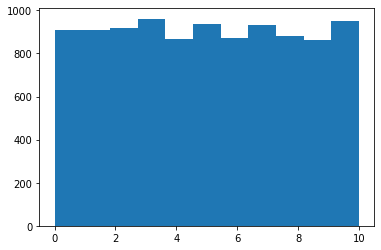

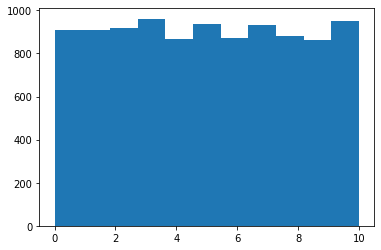

In [92]:
import matplotlib.pyplot as plt

plt.hist(speaker_indexes, bins=11)
plt.show()

plt.hist(speakers, bins=11)
plt.show()

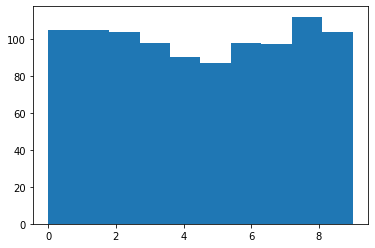

In [73]:
speakers = []
for _ in range(1000):
    index = np.random.randint(0, len(filepaths_and_text))
    speaker = index % 10
    speakers.append(speaker)
    
plt.hist(speakers)
plt.show()

In [88]:
len(speakers_index) - 1

11